In [1]:
#Module3 - Unit3 - Project3 - 'О Вкусной и здоровой пищще'

import pandas as pd
import re
import numpy as np
import datetime as dt
#импортировали исходные данные
df = pd.read_csv('main_task_new.csv')



In [2]:
#смотрим все колонки, они же и будут признаками в этом датасете
display(df.columns)
#определяем какие признаки можно использовать

#считаем % пропусков по каждому признаку
#функцияz missing_data(data) будет принимать на вход серию из датасета, и определять % пропусков и тип данных

def missing_data(data):
    for i in data.columns:
        md = 100-data[i].isna().value_counts()[0]*100/len(data[i])
        print('% пропусков в',i, md)
    return

missing_data(df)

#смотрим визуально на данные
display(df.head(2))

# Видим что надо убрать пропуски в признаках Cuisine Style,Price Range,Number of Reviews
# URL_TA ID_TA нас не сильно интересуют т.к. это ссылки на внешние ресурсы их можно использовать 
# для парсинга дополнительных данных

# - 0 - ПЕРВОНАЧАЛЬНЫЕ ЗАДАЧИ
# - 1 - необходимо получить список уникальных кухонь (сделано)
# - 2 - необходимо убрать пропуски в Price range     (сделано)
# - 3 - необходимо убрать пропуски Number of Reviews (сделано)
# - 4 - кол-во отзывов и разница между ними          (сделано)
# - 5 - дополнительные признаки (сделано)
# - 6 - парсинг для признака NOR (сделано)


# переименуем столбцы для удобства

df.rename(columns={'Restaurant_id': 'id',
                        'City': 'city',
                        'Cuisine Style': 'cuisine',
                        'Ranking': 'ranking',
                        'Rating': 'rating',
                        'Price Range': 'price_range',
                        'Number of Reviews': 'nor',
                        'Reviews': 'reviews',
                        'URL_TA': 'url_ta',
                        'ID_TA': 'id_ta' }, inplace=True)
display(df.head(2))


df['prcat']=df['price_range']

#values = {'$':1,'$$ - $$$':2,'$$$$':3}
#df['prcat'].fillna(value=values, inplace=True, axis=0)

def price_cat(data):
    if data == '$':
        return 1
    elif data == '$$ - $$$':
        return 2
    elif data == '$$$$':
        return 3

df['prcat']=df['prcat'].apply(price_cat)
df['prcat'].fillna(2, inplace=True, axis=0) #сделано на основе данных анализ из другого проектного ноутбука
missing_data(df)

#мы изменили столбец price_range и создали новый prcat заполнив пропуски средним значением по городам , это 2
#можно удалить старый столбец

df.drop(['price_range'], inplace=True, axis=1)
df.head(2)


Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

% пропусков в Restaurant_id 0.0
% пропусков в City 0.0
% пропусков в Cuisine Style 23.207499999999996
% пропусков в Ranking 0.0
% пропусков в Rating 0.0
% пропусков в Price Range 34.715
% пропусков в Number of Reviews 6.357500000000002
% пропусков в Reviews 0.0
% пропусков в URL_TA 0.0
% пропусков в ID_TA 0.0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


,id,city,cuisine,ranking,rating,price_range,nor,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


% пропусков в id 0.0
% пропусков в city 0.0
% пропусков в cuisine 23.207499999999996
% пропусков в ranking 0.0
% пропусков в rating 0.0
% пропусков в price_range 34.715
% пропусков в nor 6.357500000000002
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0


,id,city,cuisine,ranking,rating,nor,reviews,url_ta,id_ta,prcat
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0


In [3]:

# - 1 - Получим список уникальных кухонь - СДЕЛАНО

#функция которая получает на вход серию со списком всех кухонь

def resplit(ct):
    ct = ct.replace(", ",'')
    ct = ct.replace("[",'')
    ct = ct.replace("]",'')
    ct = re.split("'(.*?)'",ct)
    ct = list(filter(None, ct))
    return ct

df['cuisine'].head(5)
#заменим пропуски в типах кухнях на строковое выражение 'Unknown' 
#далее к этому выражению будет привязан процедура парсинга
df['cuisine'].fillna('Unknown', inplace=True)

cuisine_type = df['cuisine'].apply(resplit)
cuisine_type = cuisine_type.explode()

# создадим список уникальных кухонь
ctu = cuisine_type.value_counts().keys()

# удалим из списка значение Unknown т.к. это не кухня
ctu.drop('Unknown')


#посчитаем кол-во кухонь в каждом ресторане

def split_cuisine(ct):
    if re.findall(r"'(.*?)'", ct) == '':
        return ''
    else:
        return  re.findall(r"'(.*?)'", ct)

def len_list(data):
    return len(data)


df.head(5)



,id,city,cuisine,ranking,rating,nor,reviews,url_ta,id_ta,prcat
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0
1,id_1535,Stockholm,Unknown,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3.0
3,id_3456,Berlin,Unknown,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2.0


In [4]:
#тут будем заполнять кухни  через внешний парсинг т.к. он долгий, потом просто импортируем данные 
df = pd.read_csv('cuisine.csv')
missing_data(df)
df

% пропусков в Unnamed: 0 0.0
% пропусков в id 0.0
% пропусков в city 0.0
% пропусков в cuisine 0.0
% пропусков в ranking 0.0
% пропусков в rating 0.0
% пропусков в nor 6.357500000000002
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0
% пропусков в col_cuisine 0.0
% пропусков в col_c 0.0


,Unnamed: 0,id,city,cuisine,ranking,rating,nor,reviews,url_ta,id_ta,prcat,col_cuisine,col_c
0,0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0,"['European', 'French', 'International']",3
1,1,id_1535,Stockholm,Unknown,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0,"['Asian', 'Nepali']",0
2,2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3.0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",7
3,3,id_3456,Berlin,Unknown,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2.0,[],0
4,4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2.0,"['German', 'Central European', 'Vegetarian Fri...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,2.0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",4
39996,39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2.0,"['French', 'American', 'Bar', 'European', 'Veg...",5
39997,39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2.0,"['Japanese', 'Sushi']",2
39998,39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,2.0,"['Polish', 'European', 'Eastern European', 'Ce...",5


In [6]:


df['col_cuisine'] = df['col_cuisine'].apply(split_cuisine)


df['col_c'] = df['col_cuisine'].apply(len_list)

#display(df.head(5))
#создадим отдельный датафрейм для того что бы вычислить самую модную кухню в городе

#moda_c = df.explode('col_cuisine')

#moda_c.groupby('city', group_keys=False).apply(lambda x: x.nlargest(1, 'col_cuisine'))
#moda_c1 = moda_c[['city', 'col_cuisine']]
#CM = df.explode('col_cuisine').groupby('city')['col_cuisine'].value_counts()

#display(CM)
#CM1=pd.DataFrame(columns={'city','cuisine','count'})


#moda_c
#moda_c.groupby('city')['col_cuisine'].value_counts()

#CM.values[0]
#for i in range(0,len(CM)-1):
 #   new_row = {'city':list(CM.index[i])[0], 'cuisine':list(CM.index[i])[1], 'count':CM.values[i]} 
 #   CM1 = CM1.append(new_row, ignore_index=True)

#city_list=[]
#CM2 = pd.DataFrame()
#CM1

#CM1.groupby('city')['count'].max()
#CM1['city']
#for i in range(0,len(CM1)-1):
#    if CM1['city'][i] not in city_list:
#        city_list = city_list.append(CM1['city'][i])
#        display(city_list)
#        new_row = {'city':CM1['city'][i], 'cuisine':CM1['cuisine'][i], 'count':CM1['count'][i]}         
#        CM2 = CM2.append(new_row, ignore_index=True)
#CM2
#display(type(df['col_cuisine'][1]))
#display(df['col_cuisine'][1])
display(df.head(5))
missing_data(df)

,Unnamed: 0,id,city,cuisine,ranking,rating,nor,reviews,url_ta,id_ta,prcat,col_cuisine,col_c
0,0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0,"[European, French, International]",3
1,1,id_1535,Stockholm,Unknown,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0,"[Asian, Nepali]",2
2,2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3.0,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7
3,3,id_3456,Berlin,Unknown,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2.0,[],0
4,4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2.0,"[German, Central European, Vegetarian Friendly]",3


% пропусков в Unnamed: 0 0.0
% пропусков в id 0.0
% пропусков в city 0.0
% пропусков в cuisine 0.0
% пропусков в ranking 0.0
% пропусков в rating 0.0
% пропусков в nor 6.357500000000002
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0
% пропусков в col_cuisine 0.0
% пропусков в col_c 0.0


In [10]:
# не запускать пока

# - 3 - необходимо убрать пропуски в типах кухонь
#display(df.head(5))

#скопируем часть данных в отдельный датафрейм для парсинга
import requests
from bs4 import BeautifulSoup
import re
import math

df_cuisine_missing = df[['id','city','url_ta','cuisine']]

display(df_cuisine_missing.head(3))


#Записать прогон циклом по NOR если он NAN тогда только брать урл
#данные обработали и выделили в отдельный файл, поэтому все закоментировано

for i in range(0,len(df_cuisine_missing['cuisine'])-1):
    if df['cuisine'][i] == 'Unknown':
  
        url = 'https://www.tripadvisor.com' + df_cuisine_missing['url_ta'][i]
        headers = {
        'User-Agent': 'My User Agent 1.0',
        'From': 'personal@domain.com'  # This is another valid field
        }
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        pattern = re.compile(r'>[^\d]\w+<')
        pattern2 = re.compile(r'[^\d]\w+<')
        pattern3 = re.compile(r'\w+')
        
        cuisine = soup.find_all('a', class_='_2mn01bsa')
        cuis =[]
        cuis = re.findall(pattern2, str(cuisine))
        cuis = re.findall(pattern3, str(cuis))
        df['col_cuisine'][i] = cuis

df_cuisine_missing

,id,city,url_ta,cuisine
0,id_5569,Paris,/Restaurant_Review-g187147-d1912643-Reviews-R_...,"['European', 'French', 'International']"
1,id_1535,Stockholm,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,Unknown
2,id_352,London,/Restaurant_Review-g186338-d8632781-Reviews-RO...,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."


1 проверка Unknown


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


3 проверка Unknown
5 проверка Unknown
8 проверка Unknown
10 проверка Unknown
21 проверка Unknown
26 проверка Unknown
27 проверка Unknown
28 проверка Unknown
29 проверка Unknown
30 проверка Unknown
32 проверка Unknown
39 проверка Unknown
51 проверка Unknown
57 проверка Unknown
59 проверка Unknown
60 проверка Unknown
61 проверка Unknown
65 проверка Unknown
68 проверка Unknown
73 проверка Unknown
75 проверка Unknown
86 проверка Unknown
89 проверка Unknown
90 проверка Unknown
96 проверка Unknown
106 проверка Unknown
107 проверка Unknown
115 проверка Unknown
118 проверка Unknown
119 проверка Unknown
121 проверка Unknown
127 проверка Unknown
129 проверка Unknown
142 проверка Unknown
144 проверка Unknown
152 проверка Unknown
154 проверка Unknown
156 проверка Unknown
160 проверка Unknown
164 проверка Unknown
167 проверка Unknown
169 проверка Unknown
180 проверка Unknown
181 проверка Unknown
184 проверка Unknown
185 проверка Unknown
186 проверка Unknown
187 проверка Unknown
192 проверка Unknown

1719 проверка Unknown
1720 проверка Unknown
1730 проверка Unknown
1731 проверка Unknown
1734 проверка Unknown
1737 проверка Unknown
1741 проверка Unknown
1746 проверка Unknown
1748 проверка Unknown
1751 проверка Unknown
1755 проверка Unknown
1757 проверка Unknown
1759 проверка Unknown
1791 проверка Unknown
1795 проверка Unknown
1797 проверка Unknown
1804 проверка Unknown
1809 проверка Unknown
1814 проверка Unknown
1815 проверка Unknown
1818 проверка Unknown
1819 проверка Unknown
1820 проверка Unknown
1828 проверка Unknown
1829 проверка Unknown
1832 проверка Unknown
1834 проверка Unknown
1837 проверка Unknown
1841 проверка Unknown
1843 проверка Unknown
1846 проверка Unknown
1848 проверка Unknown
1849 проверка Unknown
1853 проверка Unknown
1860 проверка Unknown
1861 проверка Unknown
1864 проверка Unknown
1876 проверка Unknown
1877 проверка Unknown
1878 проверка Unknown
1888 проверка Unknown
1889 проверка Unknown
1894 проверка Unknown
1898 проверка Unknown
1899 проверка Unknown
1901 прове

3372 проверка Unknown
3378 проверка Unknown
3381 проверка Unknown
3385 проверка Unknown
3389 проверка Unknown
3397 проверка Unknown
3398 проверка Unknown
3399 проверка Unknown
3401 проверка Unknown
3403 проверка Unknown
3411 проверка Unknown
3420 проверка Unknown
3422 проверка Unknown
3424 проверка Unknown
3425 проверка Unknown
3427 проверка Unknown
3429 проверка Unknown
3432 проверка Unknown
3440 проверка Unknown
3443 проверка Unknown
3451 проверка Unknown
3456 проверка Unknown
3466 проверка Unknown
3468 проверка Unknown
3472 проверка Unknown
3483 проверка Unknown
3490 проверка Unknown
3497 проверка Unknown
3503 проверка Unknown
3504 проверка Unknown
3506 проверка Unknown
3508 проверка Unknown
3512 проверка Unknown
3513 проверка Unknown
3527 проверка Unknown
3529 проверка Unknown
3533 проверка Unknown
3538 проверка Unknown
3546 проверка Unknown
3552 проверка Unknown
3553 проверка Unknown
3559 проверка Unknown
3568 проверка Unknown
3572 проверка Unknown
3580 проверка Unknown
3586 прове

4941 проверка Unknown
4947 проверка Unknown
4950 проверка Unknown
4954 проверка Unknown
4955 проверка Unknown
4962 проверка Unknown
4969 проверка Unknown
4974 проверка Unknown
4977 проверка Unknown
4978 проверка Unknown
4982 проверка Unknown
4984 проверка Unknown
4987 проверка Unknown
4990 проверка Unknown
4992 проверка Unknown
4994 проверка Unknown
4999 проверка Unknown
5001 проверка Unknown
5011 проверка Unknown
5019 проверка Unknown
5036 проверка Unknown
5040 проверка Unknown
5044 проверка Unknown
5049 проверка Unknown
5053 проверка Unknown
5054 проверка Unknown
5063 проверка Unknown
5065 проверка Unknown
5066 проверка Unknown
5076 проверка Unknown
5077 проверка Unknown
5078 проверка Unknown
5090 проверка Unknown
5095 проверка Unknown
5097 проверка Unknown
5103 проверка Unknown
5104 проверка Unknown
5106 проверка Unknown
5107 проверка Unknown
5108 проверка Unknown
5110 проверка Unknown
5115 проверка Unknown
5117 проверка Unknown
5120 проверка Unknown
5127 проверка Unknown
5128 прове

6513 проверка Unknown
6514 проверка Unknown
6515 проверка Unknown
6523 проверка Unknown
6526 проверка Unknown
6527 проверка Unknown
6533 проверка Unknown
6537 проверка Unknown
6542 проверка Unknown
6550 проверка Unknown
6553 проверка Unknown
6554 проверка Unknown
6558 проверка Unknown
6560 проверка Unknown
6561 проверка Unknown
6562 проверка Unknown
6568 проверка Unknown
6569 проверка Unknown
6575 проверка Unknown
6576 проверка Unknown
6577 проверка Unknown
6579 проверка Unknown
6583 проверка Unknown
6587 проверка Unknown
6592 проверка Unknown
6597 проверка Unknown
6600 проверка Unknown
6606 проверка Unknown
6607 проверка Unknown
6612 проверка Unknown
6616 проверка Unknown
6618 проверка Unknown
6623 проверка Unknown
6626 проверка Unknown
6652 проверка Unknown
6658 проверка Unknown
6660 проверка Unknown
6664 проверка Unknown
6669 проверка Unknown
6671 проверка Unknown
6672 проверка Unknown
6673 проверка Unknown
6679 проверка Unknown
6682 проверка Unknown
6683 проверка Unknown
6687 прове

8076 проверка Unknown
8078 проверка Unknown
8082 проверка Unknown
8086 проверка Unknown
8091 проверка Unknown
8093 проверка Unknown
8098 проверка Unknown
8104 проверка Unknown
8105 проверка Unknown
8106 проверка Unknown
8115 проверка Unknown
8116 проверка Unknown
8121 проверка Unknown
8132 проверка Unknown
8138 проверка Unknown
8145 проверка Unknown
8147 проверка Unknown
8154 проверка Unknown
8156 проверка Unknown
8160 проверка Unknown
8163 проверка Unknown
8169 проверка Unknown
8176 проверка Unknown
8178 проверка Unknown
8180 проверка Unknown
8188 проверка Unknown
8190 проверка Unknown
8191 проверка Unknown
8203 проверка Unknown
8209 проверка Unknown
8212 проверка Unknown
8216 проверка Unknown
8217 проверка Unknown
8220 проверка Unknown
8227 проверка Unknown
8228 проверка Unknown
8229 проверка Unknown
8232 проверка Unknown
8234 проверка Unknown
8236 проверка Unknown
8240 проверка Unknown
8243 проверка Unknown
8244 проверка Unknown
8245 проверка Unknown
8246 проверка Unknown
8250 прове

9679 проверка Unknown
9684 проверка Unknown
9685 проверка Unknown
9692 проверка Unknown
9696 проверка Unknown
9704 проверка Unknown
9708 проверка Unknown
9717 проверка Unknown
9720 проверка Unknown
9721 проверка Unknown
9725 проверка Unknown
9727 проверка Unknown
9734 проверка Unknown
9738 проверка Unknown
9742 проверка Unknown
9744 проверка Unknown
9745 проверка Unknown
9750 проверка Unknown
9752 проверка Unknown
9757 проверка Unknown
9758 проверка Unknown
9759 проверка Unknown
9763 проверка Unknown
9769 проверка Unknown
9779 проверка Unknown
9795 проверка Unknown
9798 проверка Unknown
9801 проверка Unknown
9802 проверка Unknown
9809 проверка Unknown
9811 проверка Unknown
9812 проверка Unknown
9817 проверка Unknown
9821 проверка Unknown
9825 проверка Unknown
9841 проверка Unknown
9845 проверка Unknown
9851 проверка Unknown
9855 проверка Unknown
9856 проверка Unknown
9861 проверка Unknown
9866 проверка Unknown
9867 проверка Unknown
9871 проверка Unknown
9872 проверка Unknown
9875 прове

11217 проверка Unknown
11230 проверка Unknown
11236 проверка Unknown
11237 проверка Unknown
11238 проверка Unknown
11245 проверка Unknown
11248 проверка Unknown
11250 проверка Unknown
11254 проверка Unknown
11255 проверка Unknown
11263 проверка Unknown
11274 проверка Unknown
11278 проверка Unknown
11280 проверка Unknown
11285 проверка Unknown
11287 проверка Unknown
11290 проверка Unknown
11297 проверка Unknown
11298 проверка Unknown
11299 проверка Unknown
11305 проверка Unknown
11308 проверка Unknown
11310 проверка Unknown
11315 проверка Unknown
11316 проверка Unknown
11318 проверка Unknown
11320 проверка Unknown
11321 проверка Unknown
11330 проверка Unknown
11333 проверка Unknown
11336 проверка Unknown
11338 проверка Unknown
11344 проверка Unknown
11348 проверка Unknown
11355 проверка Unknown
11367 проверка Unknown
11383 проверка Unknown
11384 проверка Unknown
11397 проверка Unknown
11398 проверка Unknown
11400 проверка Unknown
11401 проверка Unknown
11406 проверка Unknown
11410 прове

12717 проверка Unknown
12720 проверка Unknown
12723 проверка Unknown
12728 проверка Unknown
12729 проверка Unknown
12732 проверка Unknown
12740 проверка Unknown
12742 проверка Unknown
12743 проверка Unknown
12750 проверка Unknown
12754 проверка Unknown
12759 проверка Unknown
12762 проверка Unknown
12765 проверка Unknown
12776 проверка Unknown
12777 проверка Unknown
12778 проверка Unknown
12790 проверка Unknown
12796 проверка Unknown
12800 проверка Unknown
12807 проверка Unknown
12815 проверка Unknown
12816 проверка Unknown
12835 проверка Unknown
12854 проверка Unknown
12859 проверка Unknown
12866 проверка Unknown
12871 проверка Unknown
12874 проверка Unknown
12876 проверка Unknown
12879 проверка Unknown
12880 проверка Unknown
12886 проверка Unknown
12887 проверка Unknown
12890 проверка Unknown
12892 проверка Unknown
12893 проверка Unknown
12897 проверка Unknown
12901 проверка Unknown
12902 проверка Unknown
12906 проверка Unknown
12907 проверка Unknown
12909 проверка Unknown
12911 прове

ConnectionError: HTTPSConnectionPool(host='www.tripadvisor.com', port=443): Max retries exceeded with url: /Restaurant_Review-g186338-d10121306-Reviews-Crepeaffaire-London_England.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000208D9BE45B0>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера'))

In [ ]:
# - парсинг типа кухни 
#скопируем часть данных в отдельный датафрейм для парсинга
import requests
from bs4 import BeautifulSoup
import re
import math

df_cuisine_missing = df[['id','city','url_ta','nor']]


#df_pars
#df_pars['nor_new'] = 0

#Записать прогон циклом по NOR если он NAN тогда только брать урл
#данные обработали и выделили в отдельный файл, поэтому все закоментировано

#for i in range(0,len(df_pars['nor'])-1):
#    if pd.isnull(df_pars['nor'][i]) == True:
#        #контроль
#        print(i,'проверка',df_pars['nor'][i])
 #       
#        url = 'https://www.tripadvisor.com' + df_pars['url_ta'][i]
 #       headers = {
 #       'User-Agent': 'My User Agent 1.0',
 #       'From': 'personal@domain.com'  # This is another valid field
 #       }
 #       response = requests.get(url, headers=headers)
 #       soup = BeautifulSoup(response.text, 'lxml')
 #       pattern = re.compile(r'"reviewCount":"\d*"')
 #       pattern2 = re.compile(r'\d*')
 #       rc = re.findall(pattern, str(soup))
 #       
 #       if isinstance(rc, str) == True:
  #          print('проверка ',rc, type(rc))
  #          df_pars['nor'][i] = re.findall(pattern2,rc[0])
 #       else:
  #          df_pars['nor'][i] = 0


In [7]:
#объединение с полученными данными


df_nor = pd.read_excel('df_pars.xls')
df333 = df.merge(df_nor, how='right')
df333.drop(['Unnamed: 0'], axis=1, inplace= True)

#missing_data(df333)
df['nor']=df333['nor']
df.drop(['Unnamed: 0'], axis=1, inplace= True)
missing_data(df)

% пропусков в id 0.0
% пропусков в city 0.0
% пропусков в cuisine 0.0
% пропусков в ranking 0.0
% пропусков в rating 0.0
% пропусков в nor 0.0
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0
% пропусков в col_cuisine 0.0
% пропусков в col_c 0.0


In [8]:

# - 4 - кол-во отзывов и разница между ними - СДЕЛАНО

#display(df.head(5))

# тип данных строка, визуально похожая на списки
# необходимо разпарсить данные
# кроме того , в строке есть дата отзыва, ее тоже надо достать
# кол-во дат будет равно кол-ву отзывов

def split_date(ct):
    if re.findall(r'\d\d/\d\d/\d{4}', ct) == 'None':
        return dt.datetime(1900,12,31)
    else:
        return  re.findall(r'\d\d/\d\d/\d{4}', ct)

df['reviews'].fillna('',inplace=True)
df['rev_date'] = df['reviews'].apply(split_date)


#создадим новый признак, кол-во отзывов
#lkz этого применим функцию считающую длинну списка с датами



df['col_r']=df['rev_date'].apply(len_list)

#для выполнения тестов по проекту необходимо посчитать самую большую разницу между двумя отзывами

def deltadays(rd):
    if len(rd)>=2:
        a = dt.datetime.strptime(rd[0], '%m/%d/%Y') - dt.datetime.strptime(rd[len(rd)-1], '%m/%d/%Y')
        return a
    else:
        return dt.timedelta(0)

#посчитали разницу между отзывами для всех ресторанов
df['time_delta'] = df['rev_date'].apply(deltadays)

#найдем теперь максимум
print('Максимальная разница между отзывами, дней', df['time_delta'].max())
print('среднее кол-во оценок относительно типа кухни и города')

#df.drop(['price_range', 'reviews', 'url_ta', 'id_ta', 'col_cuisine', 'rev_date', 'cuisine'], axis=1, inplace = True)
#df
#df['city'].groupby('col_r').mean()

Максимальная разница между отзывами, дней 3207 days 00:00:00
среднее кол-во оценок относительно типа кухни и города


In [10]:
df

,id,city,cuisine,ranking,rating,nor,reviews,url_ta,id_ta,prcat,col_cuisine,col_c,rev_date,col_r,time_delta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0,"[European, French, International]",3,"[12/31/2017, 11/20/2017]",2,41 days
1,id_1535,Stockholm,Unknown,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0,"[Asian, Nepali]",2,"[07/06/2017, 06/19/2016]",2,382 days
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3.0,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7,"[01/08/2018, 01/06/2018]",2,2 days
3,id_3456,Berlin,Unknown,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2.0,[],0,[],0,0 days
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2.0,"[German, Central European, Vegetarian Friendly]",3,"[11/18/2017, 02/19/2017]",2,272 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,2.0,"[Italian, Vegetarian Friendly, Vegan Options, ...",4,"[12/16/2017, 11/12/2017]",2,34 days
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2.0,"[French, American, Bar, European, Vegetarian F...",5,"[12/21/2017, 12/12/2017]",2,9 days
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2.0,"[Japanese, Sushi]",2,"[11/03/2016, 04/12/2008]",2,3127 days
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,2.0,"[Polish, European, Eastern European, Central E...",5,"[07/11/2017, 06/18/2017]",2,23 days


In [11]:
# - 5 - 
# к дополнительным признакам можно добавить, кол-во мест в ресторане, 
# географический признак (район города, центр не центр)
# наличие дополнительных категориальных  метрик, типа вайфай, парковка, 
#

#============================================================================
#создадим отдельный дата фрейм с разбивкой по городам и айди ресторанов
#и диапазонам цены, что бы определить среднее для каждого города
#CPR city price range
#============================================================================

cpr = df[['city','prcat']]
display(cpr.value_counts())
display(cpr[cpr['city']=='London'].value_counts())
rpr = df[['id','prcat']]
display(rpr.value_counts())

from sklearn.preprocessing import LabelEncoder
#City encoding
le = LabelEncoder()
le.fit(df.city)
df['city_le']=le.transform(df.city)

df[15:25]
missing_data(df)

city        prcat
London      2.0      4518
Paris       2.0      4080
Madrid      2.0      2645
Barcelona   2.0      2165
Berlin      2.0      1776
                     ... 
Helsinki    3.0        10
Bratislava  3.0        10
Krakow      3.0        10
Luxembourg  3.0         9
Ljubljana   3.0         7
Length: 93, dtype: int64

city    prcat
London  2.0      4518
        1.0      1025
        3.0       214
dtype: int64

id       prcat
id_561   2.0      16
id_344   2.0      15
id_453   2.0      15
id_227   2.0      15
id_245   2.0      14
                  ..
id_7350  2.0       1
id_2179  3.0       1
id_735   1.0       1
id_218   3.0       1
id_9995  2.0       1
Length: 16535, dtype: int64

% пропусков в id 0.0
% пропусков в city 0.0
% пропусков в cuisine 0.0
% пропусков в ranking 0.0
% пропусков в rating 0.0
% пропусков в nor 0.0
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0
% пропусков в col_cuisine 0.0
% пропусков в col_c 0.0
% пропусков в rev_date 0.0
% пропусков в col_r 0.0
% пропусков в time_delta 0.0
% пропусков в city_le 0.0


In [25]:
# Создадим признак - количество ресторанов в городе city_restaurants
per_city_dict = dict(df['city'].value_counts())

df['city_restaurants'] = df.city.map(per_city_dict)
df['ranking']=df333['ranking']
# Добавим признак - нормализованный ранг ranking_norm
df['rank_norm'] = df.ranking / df.city_restaurants

# Оставим для обучения модели только нормализованны ранг
df.drop(['ranking'], axis=1, inplace=True)

df

,id,city,cuisine,rating,nor,reviews,url_ta,id_ta,prcat,col_cuisine,col_c,rev_date,col_r,time_delta,city_le,city_restaurants,rank_norm
0,id_5569,Paris,"['European', 'French', 'International']",3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.0,"[European, French, International]",3,"[12/31/2017, 11/20/2017]",2,41 days,24,4897,1.137431
1,id_1535,Stockholm,Unknown,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2.0,"[Asian, Nepali]",2,"[07/06/2017, 06/19/2016]",2,382 days,27,820,1.874390
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3.0,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7,"[01/08/2018, 01/06/2018]",2,2 days,16,5757,0.061317
3,id_3456,Berlin,Unknown,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2.0,[],0,[],0,0 days,3,2155,1.604640
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2.0,"[German, Central European, Vegetarian Friendly]",3,"[11/18/2017, 02/19/2017]",2,272 days,21,893,0.695409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",4.5,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,2.0,"[Italian, Vegetarian Friendly, Vegan Options, ...",4,"[12/16/2017, 11/12/2017]",2,34 days,20,2133,0.234412
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",3.5,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2.0,"[French, American, Bar, European, Vegetarian F...",5,"[12/21/2017, 12/12/2017]",2,9 days,24,4897,1.294874
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",4.5,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2.0,"[Japanese, Sushi]",2,"[11/03/2016, 04/12/2008]",2,3127 days,27,820,2.014634
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",4.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,2.0,"[Polish, European, Eastern European, Central E...",5,"[07/11/2017, 06/18/2017]",2,23 days,29,727,0.881706


In [26]:
df.to_csv('final.csv')

In [66]:
df['city']=df333['city']
df
df.to_csv('final.csv')

In [67]:
# Создадим dummy - переменные
df = pd.get_dummies(df, columns=[ 'city',], dummy_na=True)
df.to_csv('final.csv')

In [68]:
display(df.head(3))

,id,nor,prcat,col_c,col_r,city_le,city_restaurants,rank_norm,city_Amsterdam,city_Athens,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
0,id_5569,194.0,2.0,3,2,24,4897,1.137431,0,0,...,0,0,1,0,0,0,0,0,0,0
1,id_1535,10.0,2.0,2,2,27,820,1.874390,0,0,...,0,0,0,0,0,1,0,0,0,0
2,id_352,688.0,3.0,7,2,16,5757,0.061317,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

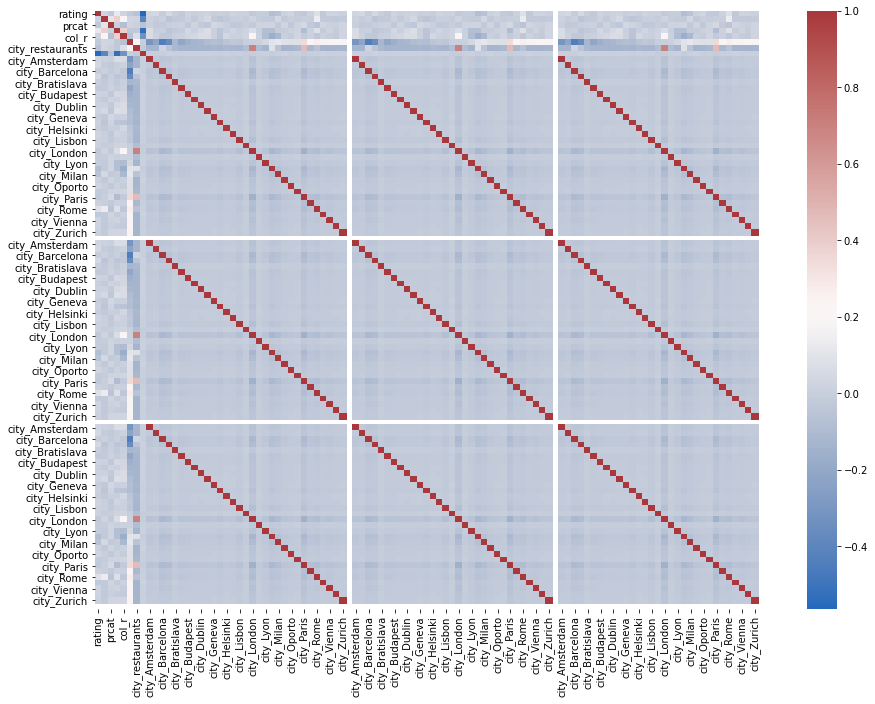

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(df.corr(), cmap='vlag')

In [48]:
missing_data(df)

% пропусков в id 0.0
% пропусков в cuisine 0.0
% пропусков в rating 0.0
% пропусков в nor 0.0
% пропусков в reviews 0.0
% пропусков в url_ta 0.0
% пропусков в id_ta 0.0
% пропусков в prcat 0.0
% пропусков в col_cuisine 0.0
% пропусков в col_c 0.0
% пропусков в rev_date 0.0
% пропусков в col_r 0.0
% пропусков в time_delta 0.0
% пропусков в city_le 0.0
% пропусков в city_restaurants 0.0
% пропусков в rank_norm 6.357500000000002


ValueError: Grouper for 'city_Amsterdam' not 1-dimensional

In [69]:
df

,id,nor,prcat,col_c,col_r,city_le,city_restaurants,rank_norm,city_Amsterdam,city_Athens,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
0,id_5569,194.0,2.0,3,2,24,4897,1.137431,0,0,...,0,0,1,0,0,0,0,0,0,0
1,id_1535,10.0,2.0,2,2,27,820,1.874390,0,0,...,0,0,0,0,0,1,0,0,0,0
2,id_352,688.0,3.0,7,2,16,5757,0.061317,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,3.0,2.0,0,0,3,2155,1.604640,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_615,84.0,2.0,3,2,21,893,0.695409,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,79.0,2.0,4,2,20,2133,0.234412,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,id_6340,542.0,2.0,5,2,24,4897,1.294874,0,0,...,0,0,1,0,0,0,0,0,0,0
39997,id_1649,4.0,2.0,2,2,27,820,2.014634,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,id_640,70.0,2.0,5,2,29,727,0.881706,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df.drop(['id_ta'], axis=1, inplace=True)
df.drop(['url_ta'], axis=1, inplace=True)
df.drop(['cuisine'], axis=1, inplace=True)
df.drop(['reviews'], axis=1, inplace=True)
df.drop(['col_cuisine'], axis=1, inplace=True)
df.drop(['rev_date'], axis=1, inplace=True)

In [70]:
#df.drop(['time_delta'], axis=1, inplace=True)
#df.drop(['rating'], axis=1, inplace=True)
df.to_csv('final.csv')
missing_data(df)

% пропусков в id 0.0
% пропусков в nor 0.0
% пропусков в prcat 0.0
% пропусков в col_c 0.0
% пропусков в col_r 0.0
% пропусков в city_le 0.0
% пропусков в city_restaurants 0.0
% пропусков в rank_norm 6.357500000000002


ValueError: Grouper for 'city_Amsterdam' not 1-dimensional